In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import initializers
from tensorflow.keras.callbacks import EarlyStopping

# Keras NN으로 model을 구성하는 함수

In [15]:
def gen_sequential_model():
    model = Sequential([
            Input(3, name='input_layer'),
            Dense(16, activation='sigmoid', name='hidden_layer1', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42)),
            Dense(1, activation='relu', name='output_layer', kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42))
            ])
    model.summary()
    print(model.layers[0].get_weights())
    print(model.layers[1].get_weights())
    
    model.compile(optimizer='sgd', loss='mse')
    
    return model

# 데이터셋을 생성하는 함수

In [3]:
def gen_non_linear_regression_dataset(numofsamples=500, a=1, b=9, c=9, d=4):
    np.random.seed(0)
    
    x1 = np.random.rand(numofsamples, 1)
    x2 = np.random.rand(numofsamples, 1)
    x3 = np.random.rand(numofsamples, 1)
    
    xx = np.concatenate((x1,x2,x3), axis=1)
    x2 = x2**2
    x3 = x3**3
    x = np.concatenate((x1,x2,x3), axis=1)
    
    coef = np.array([a,b,c])
    bias = d
    
    y = np.matmul(x, coef.T) + bias
    
    return xx, y

# 학습결과를 출력/분석하는 함수

In [4]:
def show_result(history):
    
    plt.figure(figsize=(15,10))
    
    plt.plot(history.history['loss'][1:])
    plt.plot(history.history['val_loss'][1:])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    print('train loss=', history.history['loss'][-1])
    print('test loss=', history.history['val_loss'][-1])

# 학습된 model로, y값을 예측하는 함수

In [5]:
def predict_new_sample(model, x, a=1, b=9, c=9, d=4):
    
    x = x.reshape(1,3)
    y_pred = model.predict(x)[0][0]
    
    # y = a*x1 + b*x2^2 + c*x3^3 + d
    y_actual = a*x[0][0] + b*(x[0][1]**2) + c*(x[0][2]**3) + d
    
    print('y actual value = ', y_actual)
    print('y predicted value = ', y_pred)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 16)                64        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 17        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
[array([[ 0.00079085, -0.07950435,  0.00517972,  0.0405873 , -0.08051775,
        -0.07895523,  0.03320629,  0.01739371,  0.0328981 ,  0.09575269,
         0.01707336,  0.00210763,  0.06077656,  0.00131572, -0.03984767,
         0.00479649],
       [ 0.04864612,  0.02726117,  0.05575596,  0.01813845,  0.11937493,
        -0.04969328, -0.02240689, -0.0568024 , -0.0169198 , -0.02616205,
        -0.07521835,  0.00592999, -0.05882304, -0.08310865, -0.06170285,
         0.04654578],
       [-0.01620327,  0.00106978, -0.

219/219 - 0s - loss: 0.0418 - val_loss: 0.0427
Epoch 106/1000
219/219 - 0s - loss: 0.0403 - val_loss: 0.0410
Epoch 107/1000
219/219 - 0s - loss: 0.0388 - val_loss: 0.0396
Epoch 108/1000
219/219 - 0s - loss: 0.0374 - val_loss: 0.0383
Epoch 109/1000
219/219 - 0s - loss: 0.0360 - val_loss: 0.0371
Epoch 110/1000
219/219 - 0s - loss: 0.0347 - val_loss: 0.0356
Epoch 111/1000
219/219 - 0s - loss: 0.0336 - val_loss: 0.0345
Epoch 112/1000
219/219 - 0s - loss: 0.0324 - val_loss: 0.0332
Epoch 113/1000
219/219 - 0s - loss: 0.0313 - val_loss: 0.0320
Epoch 114/1000
219/219 - 0s - loss: 0.0302 - val_loss: 0.0310
Epoch 115/1000
219/219 - 1s - loss: 0.0291 - val_loss: 0.0301
Epoch 116/1000
219/219 - 1s - loss: 0.0282 - val_loss: 0.0291
Epoch 117/1000
219/219 - 1s - loss: 0.0273 - val_loss: 0.0281
Epoch 118/1000
219/219 - 1s - loss: 0.0264 - val_loss: 0.0271
Epoch 119/1000
219/219 - 1s - loss: 0.0255 - val_loss: 0.0265
Epoch 120/1000
219/219 - 1s - loss: 0.0247 - val_loss: 0.0256
Epoch 121/1000
219/219 

Epoch 238/1000
219/219 - 1s - loss: 0.0056 - val_loss: 0.0058
Epoch 239/1000
219/219 - 1s - loss: 0.0056 - val_loss: 0.0058
Epoch 240/1000
219/219 - 1s - loss: 0.0056 - val_loss: 0.0057
Epoch 241/1000
219/219 - 1s - loss: 0.0055 - val_loss: 0.0057
Epoch 242/1000
219/219 - 1s - loss: 0.0055 - val_loss: 0.0057
Epoch 243/1000
219/219 - 1s - loss: 0.0055 - val_loss: 0.0057
Epoch 244/1000
219/219 - 1s - loss: 0.0055 - val_loss: 0.0057
Epoch 245/1000
219/219 - 1s - loss: 0.0055 - val_loss: 0.0056
Epoch 246/1000
219/219 - 1s - loss: 0.0055 - val_loss: 0.0056
Epoch 247/1000
219/219 - 1s - loss: 0.0054 - val_loss: 0.0056
Epoch 248/1000
219/219 - 1s - loss: 0.0054 - val_loss: 0.0056
Epoch 249/1000
219/219 - 1s - loss: 0.0054 - val_loss: 0.0056
Epoch 250/1000
219/219 - 1s - loss: 0.0054 - val_loss: 0.0055
Epoch 251/1000
219/219 - 1s - loss: 0.0054 - val_loss: 0.0056
Epoch 252/1000
219/219 - 1s - loss: 0.0054 - val_loss: 0.0055
Epoch 253/1000
219/219 - 1s - loss: 0.0053 - val_loss: 0.0055
Epoch 25

219/219 - 1s - loss: 0.0040 - val_loss: 0.0041
Epoch 371/1000
219/219 - 1s - loss: 0.0040 - val_loss: 0.0041
Epoch 372/1000
219/219 - 1s - loss: 0.0040 - val_loss: 0.0041
Epoch 373/1000
219/219 - 1s - loss: 0.0040 - val_loss: 0.0041
Epoch 374/1000
219/219 - 0s - loss: 0.0040 - val_loss: 0.0041
Epoch 375/1000
219/219 - 0s - loss: 0.0039 - val_loss: 0.0041
Epoch 376/1000
219/219 - 1s - loss: 0.0039 - val_loss: 0.0041
Epoch 377/1000
219/219 - 1s - loss: 0.0039 - val_loss: 0.0041
Epoch 378/1000
219/219 - 1s - loss: 0.0039 - val_loss: 0.0040
Epoch 379/1000
219/219 - 1s - loss: 0.0039 - val_loss: 0.0040
Epoch 380/1000
219/219 - 1s - loss: 0.0039 - val_loss: 0.0040
Epoch 381/1000
219/219 - 1s - loss: 0.0039 - val_loss: 0.0040
Epoch 382/1000
219/219 - 1s - loss: 0.0039 - val_loss: 0.0040
Epoch 383/1000
219/219 - 1s - loss: 0.0039 - val_loss: 0.0040
Epoch 384/1000
219/219 - 1s - loss: 0.0039 - val_loss: 0.0040
Epoch 385/1000
219/219 - 1s - loss: 0.0039 - val_loss: 0.0040
Epoch 386/1000
219/219 

Epoch 503/1000
219/219 - 1s - loss: 0.0032 - val_loss: 0.0033
Epoch 504/1000
219/219 - 1s - loss: 0.0032 - val_loss: 0.0033
Epoch 505/1000
219/219 - 1s - loss: 0.0032 - val_loss: 0.0033
Epoch 506/1000
219/219 - 1s - loss: 0.0032 - val_loss: 0.0033
Epoch 507/1000
219/219 - 1s - loss: 0.0032 - val_loss: 0.0033
Epoch 508/1000
219/219 - 1s - loss: 0.0032 - val_loss: 0.0033
Epoch 509/1000
219/219 - 1s - loss: 0.0032 - val_loss: 0.0033
Epoch 510/1000
219/219 - 1s - loss: 0.0032 - val_loss: 0.0033
Epoch 511/1000
219/219 - 0s - loss: 0.0032 - val_loss: 0.0033
Epoch 512/1000
219/219 - 1s - loss: 0.0031 - val_loss: 0.0033
Epoch 513/1000
219/219 - 1s - loss: 0.0031 - val_loss: 0.0033
Epoch 514/1000
219/219 - 1s - loss: 0.0031 - val_loss: 0.0033
Epoch 515/1000
219/219 - 1s - loss: 0.0031 - val_loss: 0.0033
Epoch 516/1000
219/219 - 1s - loss: 0.0031 - val_loss: 0.0033
Epoch 517/1000
219/219 - 1s - loss: 0.0031 - val_loss: 0.0033
Epoch 518/1000
219/219 - 1s - loss: 0.0031 - val_loss: 0.0033
Epoch 51

219/219 - 1s - loss: 0.0028 - val_loss: 0.0029
Epoch 636/1000
219/219 - 1s - loss: 0.0028 - val_loss: 0.0029
Epoch 637/1000
219/219 - 1s - loss: 0.0028 - val_loss: 0.0029
Epoch 638/1000
219/219 - 0s - loss: 0.0028 - val_loss: 0.0029
Epoch 639/1000
219/219 - 1s - loss: 0.0028 - val_loss: 0.0029
Epoch 640/1000
219/219 - 1s - loss: 0.0028 - val_loss: 0.0029
Epoch 641/1000
219/219 - 1s - loss: 0.0028 - val_loss: 0.0029
Epoch 642/1000
219/219 - 1s - loss: 0.0027 - val_loss: 0.0029
Epoch 643/1000
219/219 - 1s - loss: 0.0027 - val_loss: 0.0029
Epoch 644/1000
219/219 - 0s - loss: 0.0027 - val_loss: 0.0029
Epoch 645/1000
219/219 - 1s - loss: 0.0027 - val_loss: 0.0029
Epoch 646/1000
219/219 - 1s - loss: 0.0027 - val_loss: 0.0029
Epoch 647/1000
219/219 - 1s - loss: 0.0027 - val_loss: 0.0029
Epoch 648/1000
219/219 - 1s - loss: 0.0027 - val_loss: 0.0029
Epoch 649/1000
219/219 - 0s - loss: 0.0027 - val_loss: 0.0029
Epoch 650/1000
219/219 - 0s - loss: 0.0027 - val_loss: 0.0029
Epoch 651/1000
219/219 

Epoch 768/1000
219/219 - 0s - loss: 0.0025 - val_loss: 0.0026
Epoch 769/1000
219/219 - 0s - loss: 0.0025 - val_loss: 0.0026
Epoch 770/1000
219/219 - 0s - loss: 0.0025 - val_loss: 0.0026
Epoch 771/1000
219/219 - 1s - loss: 0.0025 - val_loss: 0.0026
Epoch 772/1000
219/219 - 1s - loss: 0.0025 - val_loss: 0.0026
Epoch 773/1000
219/219 - 0s - loss: 0.0025 - val_loss: 0.0026
Epoch 774/1000
219/219 - 0s - loss: 0.0025 - val_loss: 0.0026
Epoch 775/1000
219/219 - 0s - loss: 0.0025 - val_loss: 0.0026
Epoch 776/1000
219/219 - 1s - loss: 0.0025 - val_loss: 0.0027
Epoch 777/1000
219/219 - 1s - loss: 0.0025 - val_loss: 0.0026
Epoch 778/1000
219/219 - 0s - loss: 0.0025 - val_loss: 0.0026
Epoch 779/1000
219/219 - 1s - loss: 0.0025 - val_loss: 0.0026
Epoch 780/1000
219/219 - 1s - loss: 0.0025 - val_loss: 0.0026
Epoch 781/1000
219/219 - 1s - loss: 0.0025 - val_loss: 0.0026
Epoch 782/1000
219/219 - 1s - loss: 0.0025 - val_loss: 0.0026
Epoch 783/1000
219/219 - 0s - loss: 0.0025 - val_loss: 0.0026
Epoch 78

219/219 - 1s - loss: 0.0023 - val_loss: 0.0024
Epoch 901/1000
219/219 - 1s - loss: 0.0023 - val_loss: 0.0024
Epoch 902/1000
219/219 - 1s - loss: 0.0023 - val_loss: 0.0024
Epoch 903/1000
219/219 - 1s - loss: 0.0023 - val_loss: 0.0024
Epoch 904/1000
219/219 - 1s - loss: 0.0023 - val_loss: 0.0024
Epoch 905/1000
219/219 - 1s - loss: 0.0023 - val_loss: 0.0024
Epoch 906/1000
219/219 - 1s - loss: 0.0023 - val_loss: 0.0024
Epoch 907/1000
219/219 - 1s - loss: 0.0023 - val_loss: 0.0024
Epoch 908/1000
219/219 - 1s - loss: 0.0023 - val_loss: 0.0024
Epoch 909/1000
219/219 - 1s - loss: 0.0023 - val_loss: 0.0024
Epoch 910/1000
219/219 - 1s - loss: 0.0023 - val_loss: 0.0024
Epoch 911/1000
219/219 - 1s - loss: 0.0023 - val_loss: 0.0024
Epoch 912/1000
219/219 - 1s - loss: 0.0023 - val_loss: 0.0024
Epoch 913/1000
219/219 - 1s - loss: 0.0023 - val_loss: 0.0024
Epoch 914/1000
219/219 - 1s - loss: 0.0023 - val_loss: 0.0024
Epoch 915/1000
219/219 - 1s - loss: 0.0023 - val_loss: 0.0024
Epoch 916/1000
219/219 

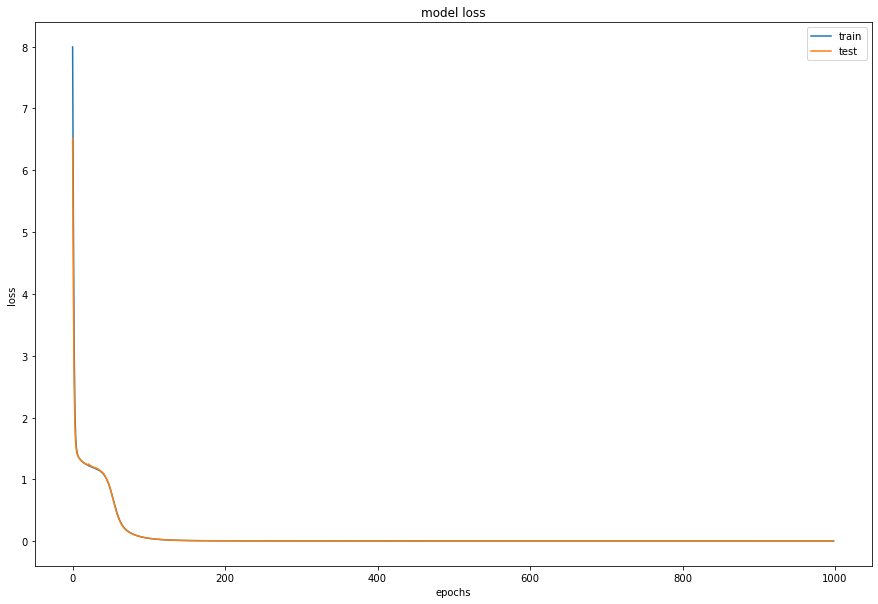

train loss= 0.00214889133349061
test loss= 0.002282439498230815
y actual value =  14.101
y predicted value =  14.108348


In [16]:
model = gen_sequential_model()
X, y = gen_non_linear_regression_dataset(numofsamples=10000)
early_stopping = EarlyStopping(patience = 25) # 조기종료 콜백함수 정의
history = model.fit(X,y, epochs=1000, verbose=2, validation_split=0.3, callbacks=[early_stopping])
show_result(history)
predict_new_sample(model, np.array([0.3, 0.6, 0.9]))